## Question1: Data preparation & feature extraction process

Imports for extraction

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training = pd.read_csv("C:/Users/Ansah/OneDrive - Ashesi University/Documents/Ashesi/Sem4/AI/Lab02_peniel.ansah/male_players (legacy).csv")

C:\Users\Ansah\AppData\Local\Temp\ipykernel_16392\242502300.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  training = pd.read_csv("C:/Users/Ansah/OneDrive - Ashesi University/Documents/Ashesi/Sem4/AI/Lab02_peniel.ansah/male_players (legacy).csv")


In [3]:
training.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [4]:
training.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,161583.000000,161583.000000,161583.0,161583.000000,161583.000000,1.595300e+05,159822.000000,161583.000000,161583.000000,161583.000000,...,128722.000000,161583.000000,161583.000000,161583.000000,161583.00000,161583.000000,161583.000000,161583.000000,161583.000000,17969.000000
mean,214484.722353,19.125514,2.0,65.699071,70.744008,2.326770e+06,10855.409768,25.123181,181.240205,75.235031,...,57.816892,45.757957,47.669996,45.698588,16.52961,16.274918,16.140374,16.288861,16.636973,39.149090
std,34928.608856,2.559318,0.0,7.040855,6.259121,6.005746e+06,21941.656285,4.670207,6.750148,7.000456,...,12.329739,20.453699,21.336404,20.935273,17.67047,16.834294,16.476466,16.998697,17.980143,10.503788
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,199159.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.000000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.00000,8.000000,8.000000,8.000000,8.000000,31.000000
50%,220621.000000,19.000000,2.0,66.000000,70.000000,7.250000e+05,4000.000000,25.000000,181.000000,75.000000,...,59.000000,50.000000,54.000000,52.000000,11.00000,11.000000,11.000000,11.000000,11.000000,41.000000
75%,236958.000000,21.000000,2.0,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.00000,14.000000,14.000000,14.000000,14.000000,46.000000
max,271817.000000,23.000000,2.0,94.000000,95.000000,1.940000e+08,575000.000000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.00000,92.000000,95.000000,92.000000,94.000000,68.000000


In [5]:
#Removing all ids, all fifa versions and urls as they are irrelevant to the overall
for i in training.columns.tolist():
    if '_url' in i:
        training.drop(i, axis = 1, inplace= True)
    if '_id' in i:
        training.drop(i, axis = 1, inplace = True)
    if 'fifa' in i:
        training.drop(i, axis = 1, inplace = True)

In [6]:
#Remove columns withe 30% or more null values too.
L= []
L_less = []
for i in training.columns:
    if((training[i].isnull().sum())<(0.3*(training.shape[0]))):
        L.append(i)
    else:
        L_less.append(i)
training = training[L]

In [7]:
# More columns to remove:
#Take out positions from the dataframe because judging the players by how good they perform at positions they perform well at can lead to biased desicions.
# 'short_name' : There is a long name which can act as an identifier
# 'club_position': The player's position in the club is less informative than performance metrics.
# 'club_jersey_number': Jersey numbers are not indicative of player skill or performance.
# 'club_joined': The date the player joined the club is less relevant compared to their performance metrics.
# 'club_contract_valid_until': Contract length is less directly tied to skill.
# 'real_face': Whether the player's face is realistic in the game is irrelevant to performance.
# Goalkeeping specific attributes are dropped since we are focusing on general player attributes:
# 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'

columns_to_drop = ['ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'long_name',
    'short_name','club_position', 'club_jersey_number', 'club_joined_date',
 'club_contract_valid_until_year', 'real_face', 
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 
    'goalkeeping_positioning', 'goalkeeping_reflexes', 'club_name', 'league_name', 'dob', 'player_positions', 'nationality_name']
training.drop(columns = columns_to_drop, axis = 1, inplace = True)

In [8]:
# separate the categorical columns from the numeric columns
categorical_players = training.select_dtypes(exclude='number')
numerical_players = training.select_dtypes(include='number')

In [9]:
training.select_dtypes(include = 'number')

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,93,95,100500000.0,550000.0,27,169,67,1.0,3,4,...,88,48,22,92,90,76,NaN,25,21,20
1,92,92,79000000.0,375000.0,29,185,80,1.0,4,5,...,93,63,24,91,81,85,NaN,22,31,23
2,90,90,54500000.0,275000.0,30,180,80,1.0,2,4,...,90,47,39,89,84,80,NaN,29,26,26
3,90,90,52500000.0,275000.0,32,195,95,1.0,4,4,...,88,84,20,86,83,91,NaN,25,41,27
4,90,90,63500000.0,300000.0,28,193,92,1.0,4,1,...,25,29,30,25,20,37,NaN,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,46,61,110000.0,700.0,18,180,73,1.0,3,2,...,31,26,21,40,42,54,40.0,23,21,25
161579,46,58,110000.0,750.0,19,188,83,1.0,3,2,...,25,46,46,31,31,31,35.0,50,51,45
161580,46,58,110000.0,500.0,19,181,73,1.0,2,2,...,32,51,43,53,40,37,35.0,36,45,50
161581,46,70,150000.0,500.0,17,175,68,1.0,3,2,...,47,27,16,45,44,63,43.0,19,17,14


In [10]:
categorical_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   preferred_foot  161583 non-null  object
 1   work_rate       161583 non-null  object
 2   body_type       161583 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB


No need to impute the categories since they are all not null

In [11]:
sc = SimpleImputer(strategy = 'mean')
scaled = sc.fit_transform(numerical_players)
numerical_players = pd.DataFrame(scaled, columns = numerical_players.columns)

In [12]:
numerical_players.isnull().sum()

overall                        0
potential                      0
value_eur                      0
wage_eur                       0
age                            0
height_cm                      0
weight_kg                      0
league_level                   0
weak_foot                      0
skill_moves                    0
international_reputation       0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_r

Use a boxplot to know the realtionahip between Categorical and Quantitative variables

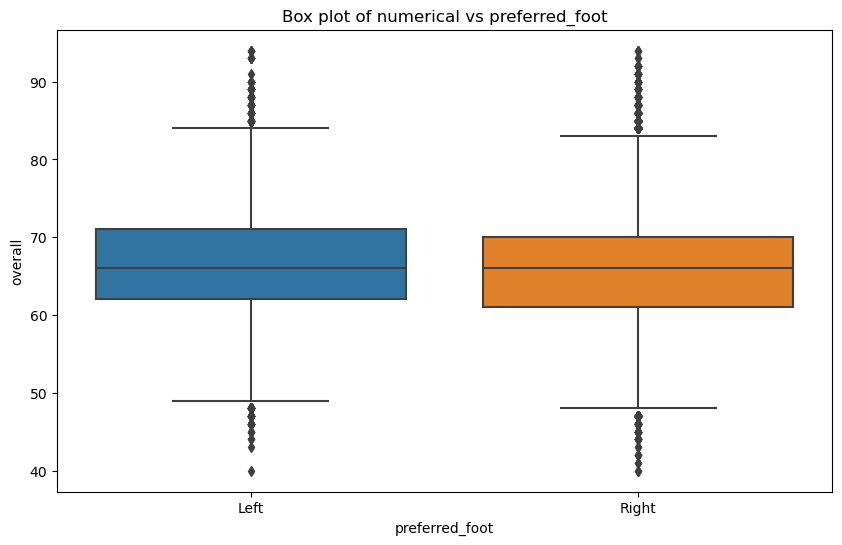

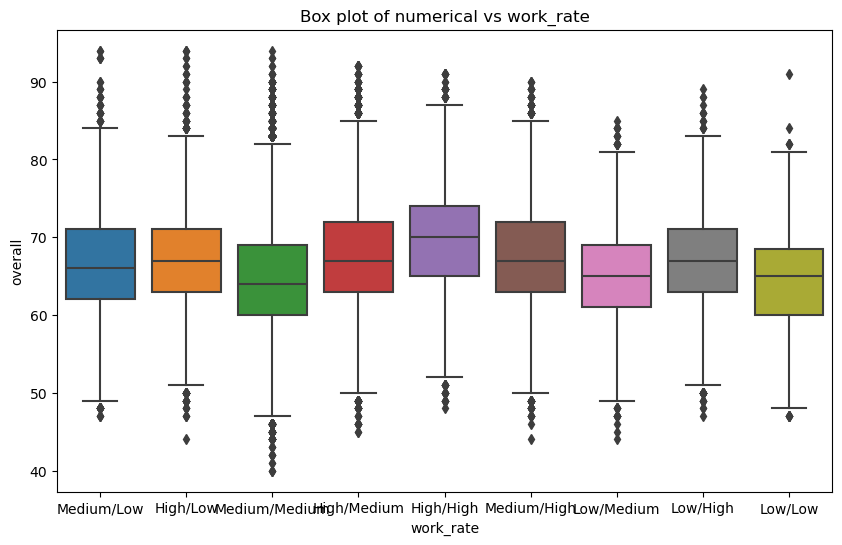

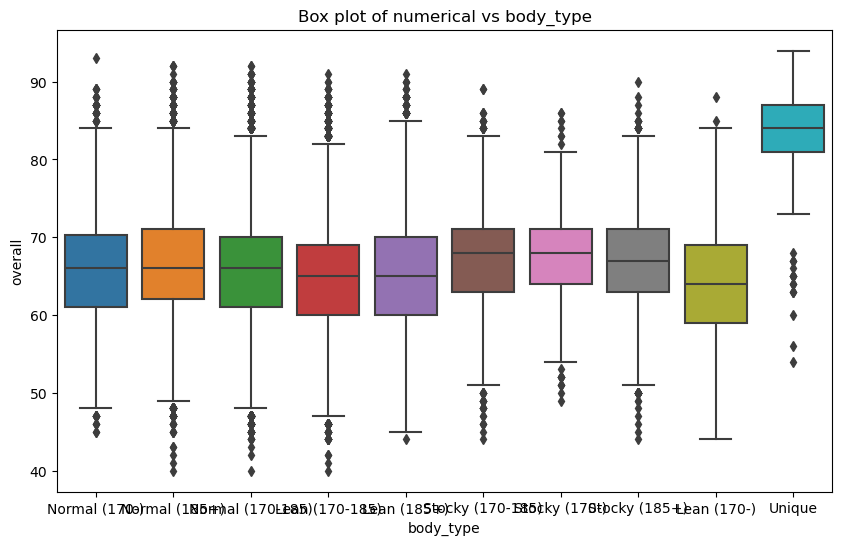

In [13]:
for col in categorical_players.columns.tolist():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=numerical_players['overall'], data = training)
    plt.title(f'Box plot of numerical vs {col}')
    plt.show()

No categories would beused since they all have less importance, and the one that changed a bit was the body weight. 
I wouldn't use the body weight category in my model because, out of the ten categories available, only the unique body type has a significant impact on the model's training. The other body weight categories don't provide useful information and might even add noise to the data, making the model less accurate and harder to interpret. By excluding this category, I can simplify the model and focus on the features that truly matter, leading to better performance and easier analysis.

In [14]:
new_players = numerical_players

In [15]:
new_players

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,93.0,95.0,100500000.0,550000.0,27.0,169.0,67.0,1.0,3.0,4.0,...,88.0,48.0,22.0,92.0,90.0,76.0,57.816892,25.0,21.0,20.0
1,92.0,92.0,79000000.0,375000.0,29.0,185.0,80.0,1.0,4.0,5.0,...,93.0,63.0,24.0,91.0,81.0,85.0,57.816892,22.0,31.0,23.0
2,90.0,90.0,54500000.0,275000.0,30.0,180.0,80.0,1.0,2.0,4.0,...,90.0,47.0,39.0,89.0,84.0,80.0,57.816892,29.0,26.0,26.0
3,90.0,90.0,52500000.0,275000.0,32.0,195.0,95.0,1.0,4.0,4.0,...,88.0,84.0,20.0,86.0,83.0,91.0,57.816892,25.0,41.0,27.0
4,90.0,90.0,63500000.0,300000.0,28.0,193.0,92.0,1.0,4.0,1.0,...,25.0,29.0,30.0,25.0,20.0,37.0,57.816892,25.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,46.0,61.0,110000.0,700.0,18.0,180.0,73.0,1.0,3.0,2.0,...,31.0,26.0,21.0,40.0,42.0,54.0,40.000000,23.0,21.0,25.0
161579,46.0,58.0,110000.0,750.0,19.0,188.0,83.0,1.0,3.0,2.0,...,25.0,46.0,46.0,31.0,31.0,31.0,35.000000,50.0,51.0,45.0
161580,46.0,58.0,110000.0,500.0,19.0,181.0,73.0,1.0,2.0,2.0,...,32.0,51.0,43.0,53.0,40.0,37.0,35.000000,36.0,45.0,50.0
161581,46.0,70.0,150000.0,500.0,17.0,175.0,68.0,1.0,3.0,2.0,...,47.0,27.0,16.0,45.0,44.0,63.0,43.000000,19.0,17.0,14.0


## Question2: Feature Engineering

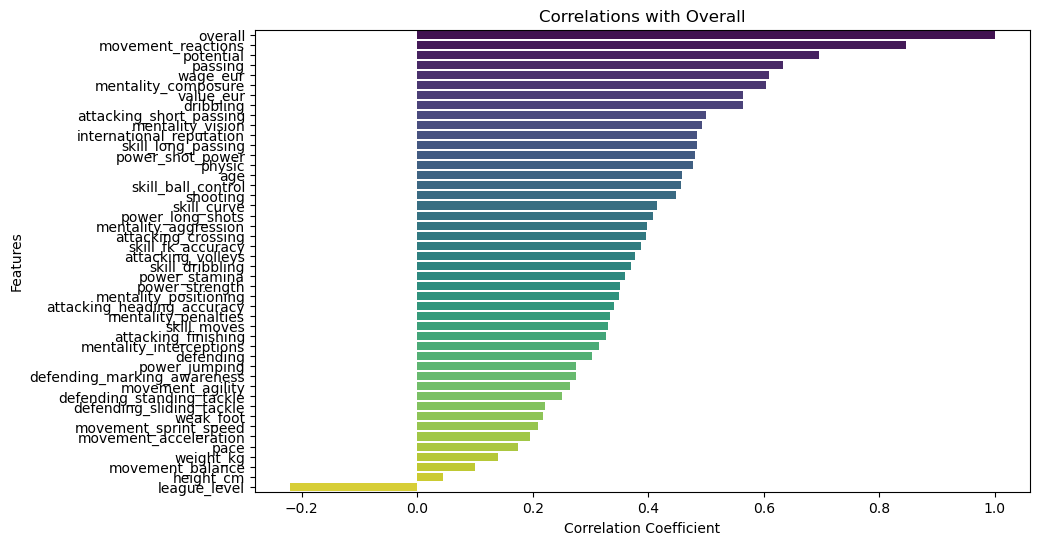

In [16]:
# Calculate the correlation matrix
corr_matrix = new_players.corr()
correlations = corr_matrix["overall"].sort_values(ascending=False)

# Plot the sorted correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")
plt.title('Correlations with Overall')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [17]:
numeric_chosen = correlations[abs(correlations.values) >= 0.5]

In [18]:
# Get the columns of numeric features that correlates well with overall
chosen_columns = []
for variable, correlation in numeric_chosen.items():
    if variable != 'overall':
        chosen_columns.append(variable)

# Create a new DataFrame with these chosen columns
X = new_players[chosen_columns]
y = new_players['overall']

In [19]:
X

,movement_reactions,potential,passing,wage_eur,mentality_composure,value_eur,dribbling
0,94.0,95.0,86.000000,550000.0,57.816892,100500000.0,96.000000
1,90.0,92.0,81.000000,375000.0,57.816892,79000000.0,91.000000
2,89.0,90.0,83.000000,275000.0,57.816892,54500000.0,92.000000
3,85.0,90.0,81.000000,275000.0,57.816892,52500000.0,86.000000
4,89.0,90.0,56.938175,300000.0,57.816892,63500000.0,62.081872
...,...,...,...,...,...,...,...
161578,39.0,61.0,40.000000,700.0,40.000000,110000.0,47.000000
161579,42.0,58.0,29.000000,750.0,35.000000,110000.0,34.000000
161580,50.0,58.0,43.000000,500.0,35.000000,110000.0,46.000000
161581,45.0,70.0,36.000000,500.0,43.000000,150000.0,46.000000


In [20]:
y

0         93.0
1         92.0
2         90.0
3         90.0
4         90.0
          ... 
161578    46.0
161579    46.0
161580    46.0
161581    46.0
161582    46.0
Name: overall, Length: 161583, dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
#This scales the independent variables
scale = StandardScaler()
scaled = scale.fit_transform(X)

#This puts the independent variables in a data frame
X = pd.DataFrame(scaled, columns = X.columns)


y_temp = y.iloc[:123813]
X_temp = X.iloc[:123813]

In [22]:
y_temp

0         93.0
1         92.0
2         90.0
3         90.0
4         90.0
          ... 
123808    47.0
123809    47.0
123810    47.0
123811    93.0
123812    92.0
Name: overall, Length: 123813, dtype: float64

In [23]:
#this is to split the training and testing data
from sklearn.model_selection import train_test_split
#After splitting we must randomise the data.  The size there determis the size of the test set. That is 20%. We randomize the data to avoid being biased.
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_temp,y_temp,test_size=0.2,random_state=42)

## Question3:Training Models

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from xgboost import XGBRegressor
from joblib import parallel_backend
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
kf = KFold(n_splits=3)

In [25]:
# RandomForest Regressor
rf = RandomForestRegressor( random_state=42)
rf.fit(Xtrain, Ytrain)

# Predict the test part
y_pred_rf = rf.predict(Xtest)
rf_scores = cross_val_score(rf, Xtrain, Ytrain, cv=3, scoring='neg_mean_squared_error')
print(f"Random Forest - Cross-Validation MSE: {-rf_scores.mean()}")

Random Forest - Cross-Validation MSE: 2.0167511073789126


In [26]:
# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(Xtrain, Ytrain)

# Predict the test set
y_pred_gb = gb.predict(Xtest)
gb_tscores = cross_val_score(gb, Xtrain, Ytrain, cv=3, scoring='neg_mean_squared_error')
print(f"GradientBoosting - Cross-Validation MSE: {-gb_tscores.mean()}")

GradientBoosting - Cross-Validation MSE: 2.9993044299041984


In [27]:
# XGB Regressor
model = XGBRegressor(random_state = 42)
model.fit(Xtrain,Ytrain)

# Predict the test set
y_pred = model.predict(Xtest)
scores = cross_val_score(model, Xtrain, Ytrain, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
print(f"XGBoosting - Cross-Validation MSE: {-scores.mean()}")

XGBoosting - Cross-Validation MSE: 1.0422513254053396


## Question4: Evaluation

In [28]:
print(f"""Random Forest - Test Set
Mean Absolute Error = {mean_absolute_error(Ytest,y_pred_rf )},
        Mean Squared Error = {mean_squared_error(Ytest,y_pred_rf)}
        Root Mean Squared Error = {np.sqrt(mean_absolute_error(Ytest,y_pred_rf))},
        R2 score = {r2_score(Ytest,y_pred_rf)}"""
)
print()

print(f"""GradientBoosting - Test Set:
Mean Absolute Error = {mean_absolute_error(Ytest,y_pred_gb )},
        Mean Squared Error = {mean_squared_error(y_pred_gb, Ytest)},
        Root Mean Squared Error = {np.sqrt(mean_squared_error(y_pred_gb, Ytest))},
        R2 score = {r2_score(y_pred_gb, Ytest)}"""
)
print()

print(f"""XGBoost - Test Set
Mean Absolute Error = {mean_absolute_error(Ytest,y_pred )},
        Mean Squared Error = {mean_squared_error(Ytest,y_pred)}
        Root Mean Squared Error = {np.sqrt(mean_absolute_error(Ytest,y_pred))},
        R2 score = {r2_score(Ytest,y_pred)}"""
)

Random Forest - Test Set
Mean Absolute Error = 0.8915712378747351,
        Mean Squared Error = 1.8859358349912703
        Root Mean Squared Error = 0.9442305003942285,
        R2 score = 0.9623341392168091

GradientBoosting - Test Set:
Mean Absolute Error = 1.2820867074564832,
        Mean Squared Error = 2.968333648802706,
        Root Mean Squared Error = 1.7228852686127147,
        R2 score = 0.9359117428880352

XGBoost - Test Set
Mean Absolute Error = 1.0245585764127918,
        Mean Squared Error = 2.0556178674853824
        Root Mean Squared Error = 1.012204809518702,
        R2 score = 0.9589452541366539


Based on the evaluation metrics, the Random Forest model has the lowest MAE, MSE, and RMSE on the test set, indicating that it has the best predictive accuracy among the three models. Additionally, it has the highest R² score, suggesting that it explains the most variance in the target variable

#### Hyperparameter Tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
param_distributions = {
    'n_estimators': [50, 60],       
    'max_features': ['log2', 'sqrt'],      
    'max_depth': [None, 10, 20],      
    'min_samples_split': [2, 5],      
    'min_samples_leaf': [1, 2],        
    'bootstrap': [True, False]               
}

In [43]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=10, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
#Train the model again
random_search.fit(Xtrain, Ytrain)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation score: {-random_search.best_score_}")
print (f"Best estimator: {random_search.best_estimator_}")

# Evaluate on test set again
best_model = random_search.best_estimator_

#predictions
rf_pred = best_model.predict(Xtest)

Best parameters found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Best cross-validation score: 1.942472147462948
Best estimator: RandomForestRegressor(bootstrap=False, max_depth=20, max_features='log2',
                      n_estimators=50, random_state=42)


In [44]:
rf_test_mae = mean_absolute_error(Ytest, rf_pred)
rf_test_rmse = np.sqrt(mean_squared_error(Ytest, rf_pred))
rf_test_rscore = r2_score(Ytest, rf_pred)

print("RandomForest Test MAE:", rf_test_mae)
print("RandomForest Test RMSE:", rf_test_rmse)
print("RandomForest Test R2 score:", rf_test_rscore)

RandomForest Test MAE: 0.9062385912047556
RandomForest Test RMSE: 1.3420962282885158
RandomForest Test R2 score: 0.9640260359844887


## Question5: Test With New Dataset

In [45]:
players_22 = pd.read_csv("C:/Users/Ansah/OneDrive - Ashesi University/Documents/Ashesi/Sem4/AI/Lab02_peniel.ansah/players_22-1.csv")

C:\Users\Ansah\AppData\Local\Temp\ipykernel_16392\4269270345.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_22 = pd.read_csv("C:/Users/Ansah/OneDrive - Ashesi University/Documents/Ashesi/Sem4/AI/Lab02_peniel.ansah/players_22-1.csv")


In [46]:
#Get the features used to train the model.
test_players = players_22[X_temp.columns.tolist()]

#Fill the null values in the numerical columns with the mean values
sc = SimpleImputer(strategy = 'mean')
imputed_players = sc.fit_transform(test_players)
test_players = pd.DataFrame(imputed_players, columns = test_players.columns)

#Scale the features.
scale = StandardScaler()
scaled = scale.fit_transform(test_players)
test_players = pd.DataFrame(scaled, columns = test_players.columns)

In [47]:
#Get the target
target = players_22.loc[:,'overall']

In [48]:
# Make predictions using the test dataset
test_predictions = best_model.predict(test_players)

In [49]:
# Evaluate predictions using MAE, RMSE, and R² score
rf_mae_new = mean_absolute_error(target,test_predictions)
rf_rmse_new = np.sqrt(mean_squared_error(target,test_predictions))
rf_rscore_new = r2_score(target,test_predictions)


print("Random Forest Model Metrics on New Data:")
print(f"MAE: {rf_mae_new}")
print(f"RMSE: {rf_rmse_new}")
print(f"R² Score: {rf_rscore_new}")

Random Forest Model Metrics on New Data:
MAE: 1.6674727512756926
RMSE: 2.3338557721143847
R² Score: 0.884929367883574


## Saving the model

In [38]:
import pickle as pkl

In [39]:
file_path = 'C:\\Users\\Ansah\\OneDrive - Ashesi University\\Documents\\Ashesi\\Sem4\\AI\\Lab02_peniel.ansah\\' + best_model.__class__.__name__ + '.pkl'

with open(file_path, 'wb') as file:
    pkl.dump(best_model, file)

In [40]:
file_path = 'C:\\Users\\Ansah\\OneDrive - Ashesi University\\Documents\\Ashesi\\Sem4\\AI\\Lab02_peniel.ansah\\' + scale.__class__.__name__ + '.pkl'

with open(file_path, 'wb') as file:
    pkl.dump(scale, file)